In [13]:
# Core imports
import os
from datetime import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Inline plots (Jupyter/Colab)
%matplotlib inline

# Pandas display
pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 120)


In [ ]:
CSV_PATH = "dataset/Dataset.csv"

encodings_to_try = [None, "utf-8", "utf-8-sig", "latin-1"]
last_err = None
for enc in encodings_to_try:
    try:
        df = pd.read_csv(CSV_PATH, encoding=enc) if enc else pd.read_csv(CSV_PATH)
        break
    except Exception as e:
        last_err = e
else:
    raise last_err

print(f"Loaded: {CSV_PATH}")
df.head()

In [14]:
print("Shape:", df.shape)
print("\nDtypes:\n", df.dtypes)
print("\nDuplicate rows:", df.duplicated().sum())

mem_mb = round(df.memory_usage(deep=True).sum() / (1024**2), 3)
print(f"\nApprox memory usage: {mem_mb} MB")

# pandas info (non-null counts)
df.info()


Shape: (500, 55)

Dtypes:
 User_ID                            object
Age                                 int64
Gender                             object
Country                            object
Employment_Status                  object
Annual_Income                       int64
Current_Savings                     int64
Retirement_Age_Goal                 int64
Risk_Tolerance                     object
Contribution_Amount                 int64
Contribution_Frequency             object
Employer_Contribution               int64
Total_Annual_Contribution           int64
Years_Contributed                   int64
Investment_Type                    object
Fund_Name                          object
Annual_Return_Rate                float64
Volatility                        float64
Fees_Percentage                   float64
Projected_Pension_Amount            int64
Expected_Annual_Payout              int64
Inflation_Adjusted_Payout           int64
Years_of_Payout                     int64
Survivo

In [15]:
def try_parse_datetime(series, threshold=0.8):
    s = series.dropna().astype(str)
    if len(s) == 0:
        return series, False
    parsed = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
    if parsed.notna().mean() >= threshold:
        return pd.to_datetime(series, errors="coerce", infer_datetime_format=True), True
    return series, False

dt_converted = []
for col in df.select_dtypes(include=["object"]).columns:
    new_s, converted = try_parse_datetime(df[col])
    if converted:
        df[col] = new_s
        dt_converted.append(col)

print("Datetime columns newly detected:", dt_converted if dt_converted else "None")
df.dtypes


/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  parsed = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https:/

Datetime columns newly detected: ['Transaction_Date', 'Time_of_Transaction']


/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  return pd.to_datetime(series, errors="coerce", infer_datetime_format=True), True
/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:5: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  parsed = pd.to_datetime(s, errors="coerce", infer_datetime_format=True)
/var/folders/gh/t6jzfxjd5t9fr6pzlkzrbgtc0000gn/T/ipykernel_71632/3173379463.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-e

User_ID                                   object
Age                                        int64
Gender                                    object
Country                                   object
Employment_Status                         object
Annual_Income                              int64
Current_Savings                            int64
Retirement_Age_Goal                        int64
Risk_Tolerance                            object
Contribution_Amount                        int64
Contribution_Frequency                    object
Employer_Contribution                      int64
Total_Annual_Contribution                  int64
Years_Contributed                          int64
Investment_Type                           object
Fund_Name                                 object
Annual_Return_Rate                       float64
Volatility                               float64
Fees_Percentage                          float64
Projected_Pension_Amount                   int64
Expected_Annual_Payo

In [16]:
numeric_cols   = df.select_dtypes(include=[np.number]).columns.tolist()
bool_cols      = df.select_dtypes(include=["bool"]).columns.tolist()
datetime_cols  = df.select_dtypes(include=["datetime64[ns]", "datetime64[ns, UTC]"]).columns.tolist()

# Treat bool as categorical for most ML workflows
categorical_cols = df.select_dtypes(include=["object", "category"]).columns.tolist() + bool_cols
categorical_cols = [c for c in categorical_cols if c not in datetime_cols]

print("Numeric cols   (", len(numeric_cols), "):", numeric_cols)
print("Categorical cols(", len(categorical_cols), "):", categorical_cols)
print("Datetime cols  (", len(datetime_cols), "):", datetime_cols)


Numeric cols   ( 25 ): ['Age', 'Annual_Income', 'Current_Savings', 'Retirement_Age_Goal', 'Contribution_Amount', 'Employer_Contribution', 'Total_Annual_Contribution', 'Years_Contributed', 'Annual_Return_Rate', 'Volatility', 'Fees_Percentage', 'Projected_Pension_Amount', 'Expected_Annual_Payout', 'Inflation_Adjusted_Payout', 'Years_of_Payout', 'Transaction_Amount', 'Anomaly_Score', 'Number_of_Dependents', 'Life_Expectancy_Estimate', 'Debt_Level', 'Monthly_Expenses', 'Savings_Rate', 'Portfolio_Diversity_Score', 'Transaction_Pattern_Score', 'Account_Age']
Categorical cols( 28 ): ['User_ID', 'Gender', 'Country', 'Employment_Status', 'Risk_Tolerance', 'Contribution_Frequency', 'Investment_Type', 'Fund_Name', 'Survivor_Benefits', 'Transaction_ID', 'Suspicious_Flag', 'Marital_Status', 'Education_Level', 'Health_Status', 'Home_Ownership_Status', 'Investment_Experience_Level', 'Financial_Goals', 'Insurance_Coverage', 'Tax_Benefits_Eligibility', 'Government_Pension_Eligibility', 'Private_Pension

In [17]:
# Numeric describe (+ skew/kurtosis)
if numeric_cols:
    num_desc = df[numeric_cols].describe().T
    num_desc["skew"] = df[numeric_cols].skew(numeric_only=True)
    num_desc["kurtosis"] = df[numeric_cols].kurtosis(numeric_only=True)
    display(num_desc)
else:
    print("No numeric columns.")

# Categorical uniqueness
if categorical_cols:
    cat_uniques = (
        pd.DataFrame({
            "n_unique": [df[c].nunique(dropna=True) for c in categorical_cols]
        }, index=categorical_cols)
        .sort_values("n_unique", ascending=False)
    )
    display(cat_uniques)
else:
    print("No categorical columns.")


,count,mean,std,min,25%,50%,75%,max,skew,kurtosis
Age,500.0,43.91600,11.142228,25.00,35.0000,43.000,54.0000,64.00,0.040878,-1.155905
Annual_Income,500.0,92651.62400,34869.422854,30588.00,60897.7500,93713.500,125185.0000,149764.00,-0.089100,-1.252795
Current_Savings,500.0,249007.60800,145712.112922,6587.00,127299.7500,244379.000,379419.0000,499353.00,0.062171,-1.195530
Retirement_Age_Goal,500.0,64.47800,2.861799,60.00,62.0000,64.000,67.0000,69.00,0.027813,-1.235939
Contribution_Amount,500.0,1049.31200,559.174745,102.00,581.7500,1056.500,1513.7500,1999.00,-0.035464,-1.202950
Employer_Contribution,500.0,518.10200,290.391381,0.00,284.0000,510.500,763.2500,999.00,-0.016907,-1.163779
Total_Annual_Contribution,500.0,12679.23000,6630.218865,1232.00,7167.2500,12586.500,18367.2500,23961.00,0.026422,-1.185837
Years_Contributed,500.0,19.12000,10.900240,1.00,10.0000,19.000,27.2500,39.00,0.155505,-1.059774
Annual_Return_Rate,500.0,6.92832,2.863628,2.00,4.4025,6.890,9.2025,11.98,0.084437,-1.154067
Volatility,500.0,2.82950,1.321810,0.52,1.7150,2.820,3.9725,5.00,-0.058101,-1.177099


,n_unique
User_ID,500
Device_ID,500
IP_Address,500
Transaction_ID,500
Fund_Name,493
Geo_Location,490
Country,5
Employment_Status,5
Investment_Type,5
Marital_Status,4


In [18]:
id_like = []
n = len(df)
for col in df.columns:
    uniq = df[col].nunique(dropna=True)
    if n > 0 and uniq >= 0.95 * n:
        id_like.append(col)

print("Potential ID-like cols (high cardinality):", id_like if id_like else "None")


Potential ID-like cols (high cardinality): ['User_ID', 'Annual_Income', 'Current_Savings', 'Total_Annual_Contribution', 'Fund_Name', 'Projected_Pension_Amount', 'Expected_Annual_Payout', 'Inflation_Adjusted_Payout', 'Transaction_ID', 'Transaction_Amount', 'Debt_Level', 'Monthly_Expenses', 'IP_Address', 'Device_ID', 'Geo_Location', 'Time_of_Transaction']


In [19]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
missing_df.index.name = "column"
missing_df = missing_df.reset_index()

display(missing_df.head(20))

# Bar chart of missingness (top 20)
top = missing_df[missing_df["missing_count"] > 0].head(20)
if not top.empty:
    plt.figure(figsize=(8, 4))
    plt.bar(top["column"], top["missing_count"])
    plt.xticks(rotation=90)
    plt.title("Missing values per column (top 20)")
    plt.xlabel("Column")
    plt.ylabel("Missing count")
    plt.tight_layout()
    plt.show()
else:
    print("No missing values.")


,column,missing_count,missing_pct
0,User_ID,0,0.0
1,Portfolio_Diversity_Score,0,0.0
2,Number_of_Dependents,0,0.0
3,Education_Level,0,0.0
4,Health_Status,0,0.0
5,Life_Expectancy_Estimate,0,0.0
6,Home_Ownership_Status,0,0.0
7,Debt_Level,0,0.0
8,Monthly_Expenses,0,0.0
9,Savings_Rate,0,0.0


No missing values.


In [20]:
dup_count = df.duplicated().sum()
print("Duplicate rows:", dup_count)

# Optional: remove duplicates
# df = df.drop_duplicates().reset_index(drop=True)
# print("After drop_duplicates -> Shape:", df.shape)


Duplicate rows: 0


In [21]:
rows = []
for col in categorical_cols:
    n_unique = df[col].nunique(dropna=True)
    top_vals = df[col].value_counts(dropna=False).head(10)
    rows.append({"column": col, "n_unique": n_unique, "top_10": dict(top_vals)})

cardinality_df = pd.DataFrame(rows).sort_values("n_unique", ascending=False)
display(cardinality_df)

# Quick peek: top 10 for first few categoricals
for col in categorical_cols[:5]:
    print(f"\nTop categories for: {col}")
    display(df[col].value_counts(dropna=False).head(10).to_frame("count"))


,column,n_unique,top_10
0,User_ID,500,"{'U1000': 1, 'U1329': 1, 'U1342': 1, 'U1341': ..."
25,Device_ID,500,"{'549227c9-cc8c-4902-b7d1-651e3c196dc4': 1, 'b..."
24,IP_Address,500,"{'221.151.158.51': 1, '81.51.111.209': 1, '107..."
9,Transaction_ID,500,"{'f3e3a449-5731-4bfa-8195-e3bb191ab167': 1, '6..."
7,Fund_Name,493,"{'Hayes Group': 2, 'Miller Ltd': 2, 'Jones and..."
26,Geo_Location,490,"{'West David': 2, 'Port Johnhaven': 2, 'New Ma..."
2,Country,5,"{'Germany': 108, 'Canada': 104, 'Australia': 9..."
3,Employment_Status,5,"{'Self-employed': 105, 'Retired': 105, 'Part-t..."
6,Investment_Type,5,"{'Stocks': 112, 'Bonds': 105, 'Mutual Fund': 1..."
11,Marital_Status,4,"{'Divorced': 133, 'Single': 129, 'Married': 11..."



Top categories for: User_ID


,count
User_ID,
U1000,1
U1329,1
U1342,1
U1341,1
U1340,1
U1339,1
U1338,1
U1337,1
U1336,1



Top categories for: Gender


,count
Gender,
Male,183
Other,180
Female,137



Top categories for: Country


,count
Country,
Germany,108
Canada,104
Australia,98
UK,95
USA,95



Top categories for: Employment_Status


,count
Employment_Status,
Self-employed,105
Retired,105
Part-time,102
Unemployed,96
Full-time,92



Top categories for: Risk_Tolerance


,count
Risk_Tolerance,
High,169
Low,168
Medium,163


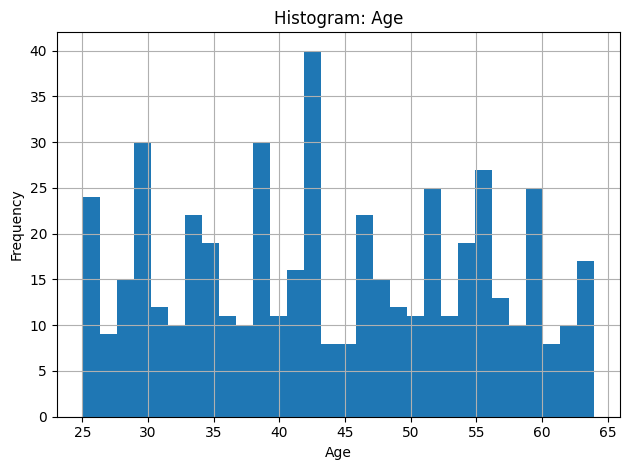

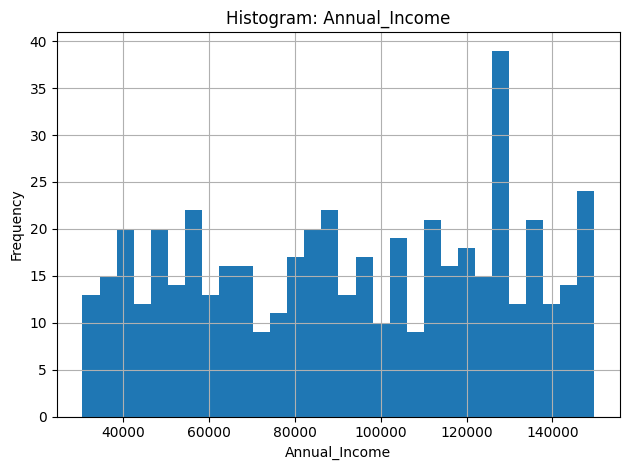

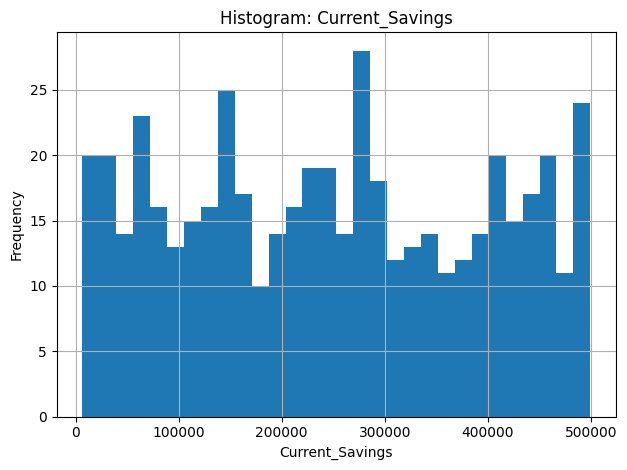

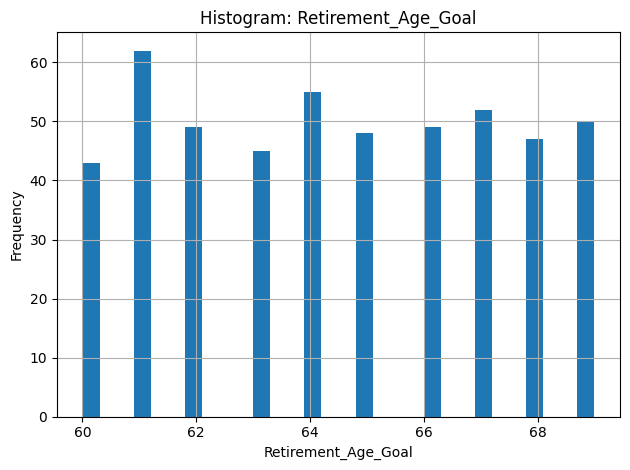

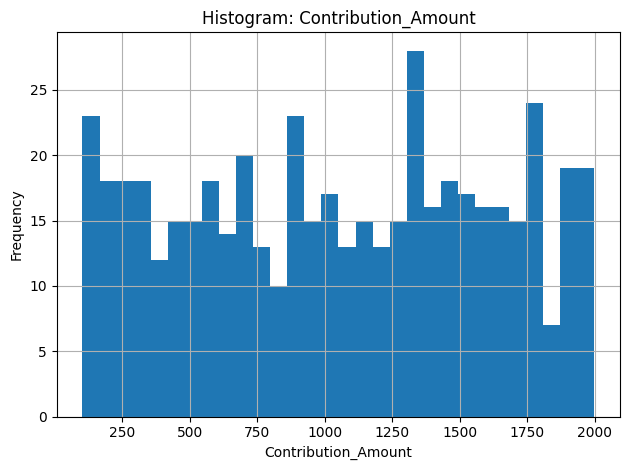

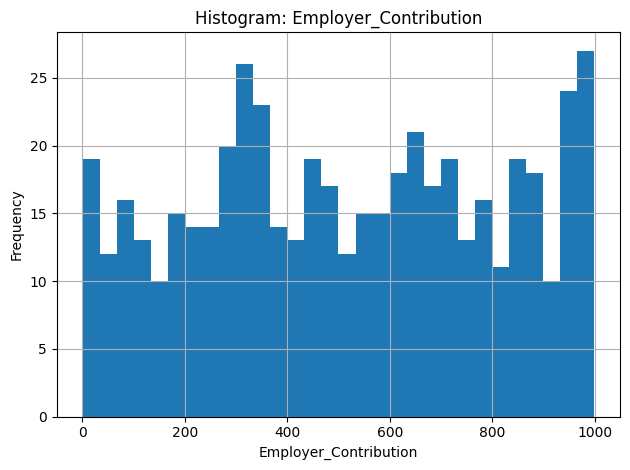

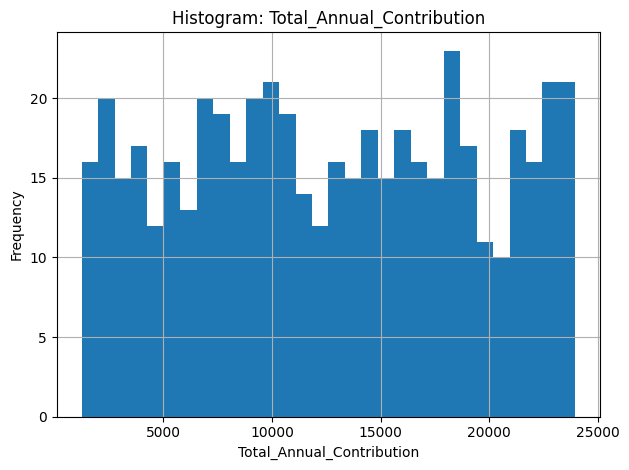

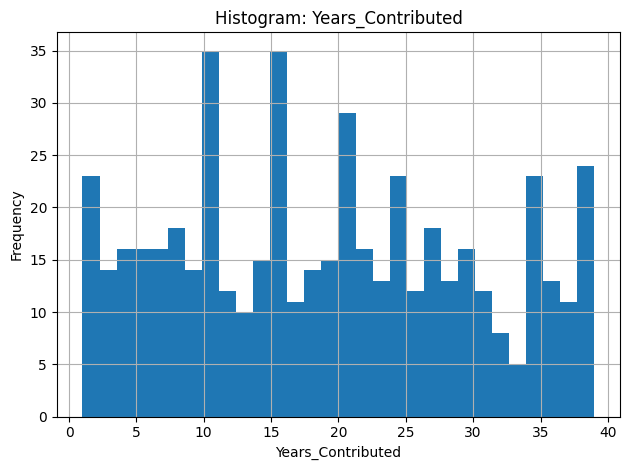

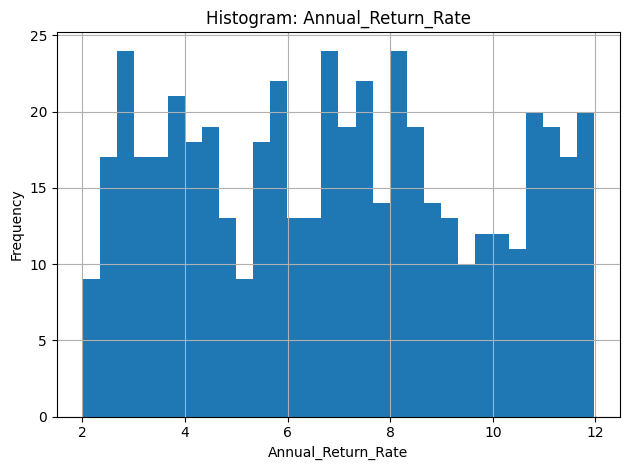

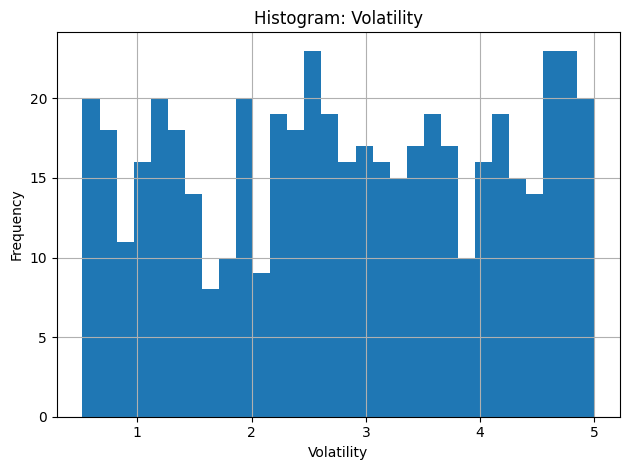

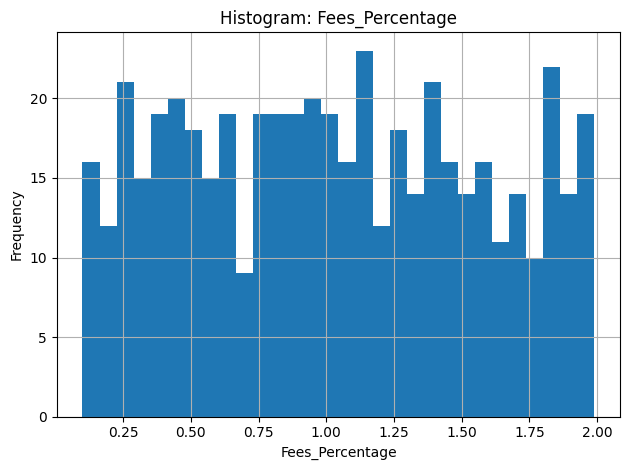

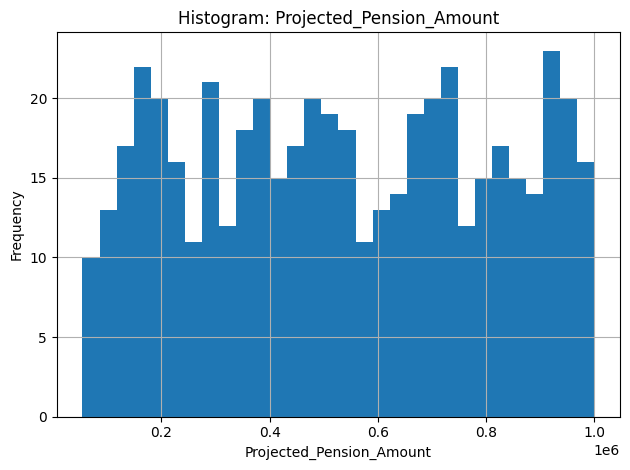

(Showing first 12 / 25 numeric columns)


In [22]:
MAX_NUMERIC_PLOTS = 12
for col in numeric_cols[:MAX_NUMERIC_PLOTS]:
    plt.figure()
    df[col].hist(bins=30)
    plt.title(f"Histogram: {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

if len(numeric_cols) > MAX_NUMERIC_PLOTS:
    print(f"(Showing first {MAX_NUMERIC_PLOTS} / {len(numeric_cols)} numeric columns)")


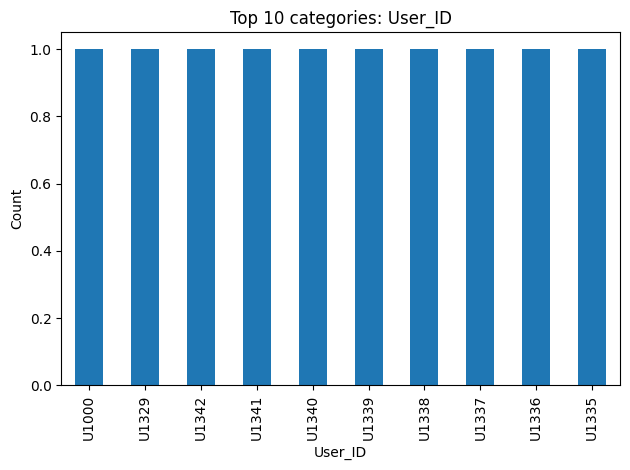

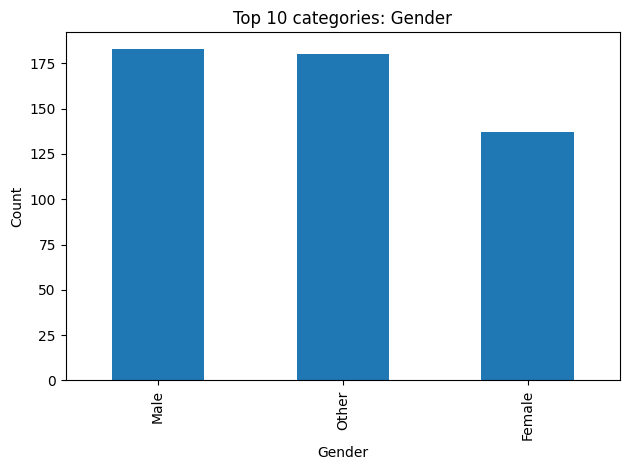

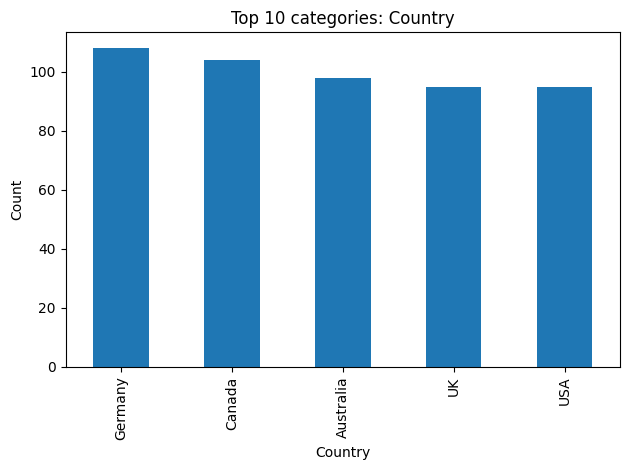

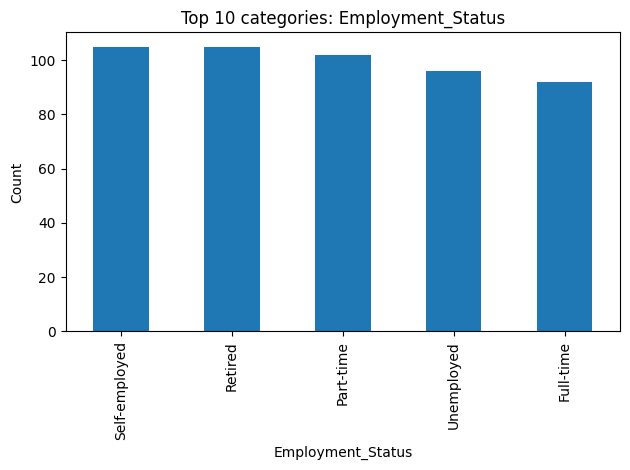

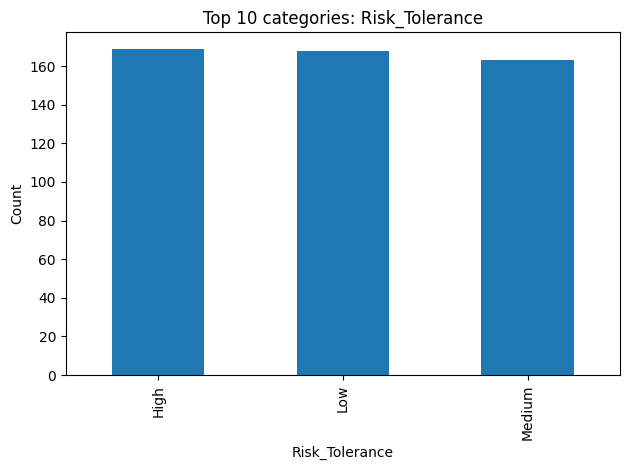

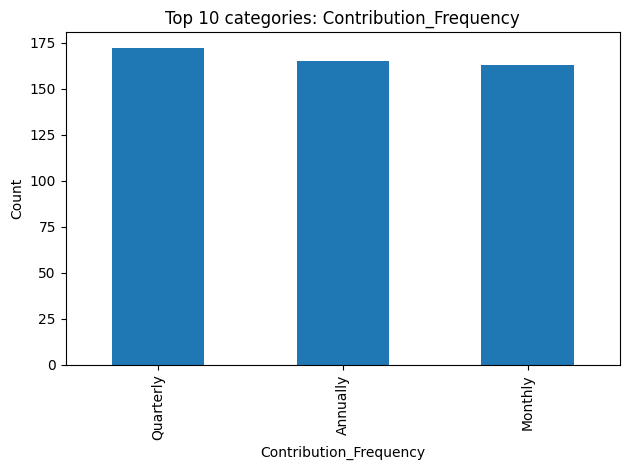

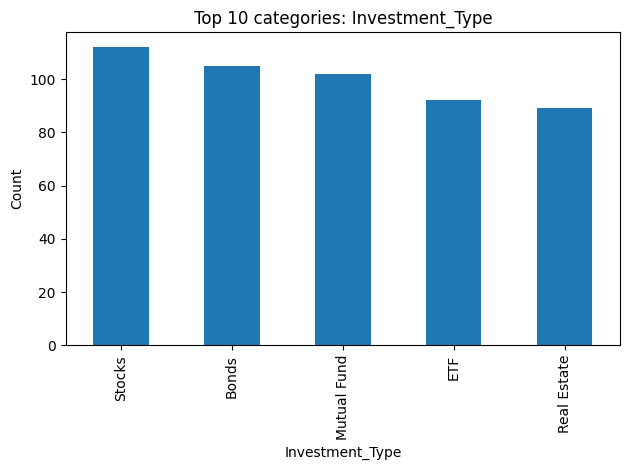

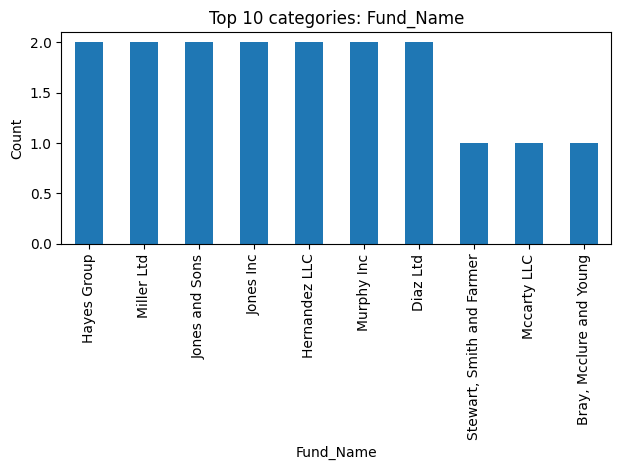

(Showing first 8 / 28 categorical columns)


In [23]:
MAX_CATEG_PLOTS = 8
for col in categorical_cols[:MAX_CATEG_PLOTS]:
    plt.figure()
    df[col].value_counts(dropna=False).head(10).plot(kind="bar")
    plt.title(f"Top 10 categories: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

if len(categorical_cols) > MAX_CATEG_PLOTS:
    print(f"(Showing first {MAX_CATEG_PLOTS} / {len(categorical_cols)} categorical columns)")


In [24]:
outlier_rows = []
for col in numeric_cols:
    s = df[col].dropna()
    if s.empty:
        outlier_rows.append({"column": col, "iqr_outliers": 0, "outlier_pct": 0.0})
        continue
    q1 = s.quantile(0.25)
    q3 = s.quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    mask = (df[col] < lower) | (df[col] > upper)
    outlier_count = int(mask.sum())
    outlier_pct = round((outlier_count / len(df)) * 100, 2) if len(df) else 0.0
    outlier_rows.append({"column": col, "iqr_outliers": outlier_count, "outlier_pct": outlier_pct})

outliers_df = (pd.DataFrame(outlier_rows)
               if outlier_rows else pd.DataFrame(columns=["column","iqr_outliers","outlier_pct"]))
display(outliers_df.sort_values("outlier_pct", ascending=False).head(20))


,column,iqr_outliers,outlier_pct
0,Age,0,0.0
13,Inflation_Adjusted_Payout,0,0.0
23,Transaction_Pattern_Score,0,0.0
22,Portfolio_Diversity_Score,0,0.0
21,Savings_Rate,0,0.0
20,Monthly_Expenses,0,0.0
19,Debt_Level,0,0.0
18,Life_Expectancy_Estimate,0,0.0
17,Number_of_Dependents,0,0.0
16,Anomaly_Score,0,0.0


,Age,Annual_Income,Current_Savings,Retirement_Age_Goal,Contribution_Amount,Employer_Contribution,Total_Annual_Contribution,Years_Contributed,Annual_Return_Rate,Volatility,Fees_Percentage,Projected_Pension_Amount,Expected_Annual_Payout,Inflation_Adjusted_Payout,Years_of_Payout,Transaction_Amount,Anomaly_Score,Number_of_Dependents,Life_Expectancy_Estimate,Debt_Level,Monthly_Expenses,Savings_Rate,Portfolio_Diversity_Score,Transaction_Pattern_Score,Account_Age
Age,1.000000,0.022875,-0.050722,0.085917,-0.012245,0.000318,-0.012369,0.069417,-0.000947,-0.018926,-0.068919,0.004987,0.007929,-0.053412,-0.047921,-0.079959,-0.054887,0.038280,-0.043292,-0.032795,0.047039,-0.024987,0.017784,-0.071852,-0.021034
Annual_Income,0.022875,1.000000,0.051726,-0.022154,-0.014778,-0.024799,0.044685,0.023930,-0.046938,0.084333,0.010842,0.004975,-0.024676,0.012830,-0.073647,0.071789,-0.044790,0.041240,0.004837,0.047681,-0.045027,0.061931,0.062368,0.017726,0.041636
Current_Savings,-0.050722,0.051726,1.000000,0.000049,-0.011842,0.000202,-0.096791,0.003300,-0.040382,-0.012628,0.145457,-0.046754,-0.046371,-0.065585,0.049275,0.016270,0.014626,0.007416,-0.012735,0.006423,0.018487,-0.098269,-0.022671,0.062208,-0.048038
Retirement_Age_Goal,0.085917,-0.022154,0.000049,1.000000,-0.008789,-0.019560,0.045752,-0.006083,-0.000897,0.003867,-0.004632,0.061484,0.022556,-0.125967,-0.075939,-0.043724,0.012544,-0.019403,0.035471,-0.014864,0.015520,-0.004867,-0.002612,0.052514,-0.082664
Contribution_Amount,-0.012245,-0.014778,-0.011842,-0.008789,1.000000,-0.001061,0.122789,0.022620,-0.055938,-0.052396,-0.072400,0.017031,0.010101,0.002099,-0.034222,0.031346,0.076178,-0.062385,0.093289,0.025821,0.036806,-0.028289,-0.096033,-0.107968,0.009931
Employer_Contribution,0.000318,-0.024799,0.000202,-0.019560,-0.001061,1.000000,0.009167,-0.036979,0.049189,-0.013073,0.007891,-0.061355,-0.006382,-0.067368,-0.023845,0.099062,-0.027951,0.069415,-0.110755,-0.049906,-0.037810,-0.054461,0.092030,0.014725,-0.043206
Total_Annual_Contribution,-0.012369,0.044685,-0.096791,0.045752,0.122789,0.009167,1.000000,-0.053759,-0.072905,0.025388,-0.018783,-0.038740,0.096278,-0.037044,-0.000902,0.113029,0.115056,-0.036805,0.037736,-0.056218,0.011844,-0.039661,-0.035727,0.042434,-0.056887
Years_Contributed,0.069417,0.023930,0.003300,-0.006083,0.022620,-0.036979,-0.053759,1.000000,0.007593,0.053256,-0.034557,0.028981,-0.013792,0.023912,-0.033417,0.013397,0.026448,-0.012851,-0.078111,0.039565,-0.029566,-0.029698,0.017527,-0.104962,0.048242
Annual_Return_Rate,-0.000947,-0.046938,-0.040382,-0.000897,-0.055938,0.049189,-0.072905,0.007593,1.000000,0.035935,0.025860,-0.000170,-0.022680,0.003785,-0.028806,0.045370,-0.066610,-0.051099,-0.039428,-0.055605,-0.038334,0.021176,0.059882,0.033655,0.107336
Volatility,-0.018926,0.084333,-0.012628,0.003867,-0.052396,-0.013073,0.025388,0.053256,0.035935,1.000000,-0.026851,-0.030804,-0.039707,0.052217,-0.002984,0.098449,-0.072821,-0.010883,-0.082942,-0.121586,0.004650,0.038233,-0.031987,-0.023411,0.060945


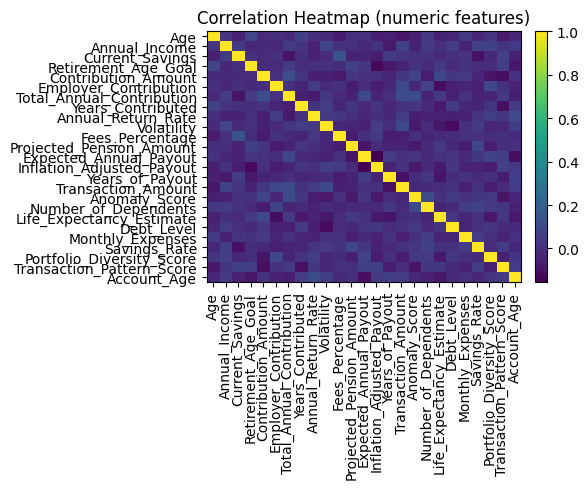

In [25]:
if len(numeric_cols) >= 2:
    corr_df = df[numeric_cols].corr(numeric_only=True)
    display(corr_df)

    plt.figure(figsize=(6, 5))
    im = plt.imshow(corr_df.values, aspect="auto", interpolation="nearest")
    plt.xticks(range(len(corr_df.columns)), corr_df.columns, rotation=90)
    plt.yticks(range(len(corr_df.index)), corr_df.index)
    plt.title("Correlation Heatmap (numeric features)")
    plt.colorbar(im, fraction=0.046, pad=0.04)
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for correlations.")


In [26]:
TARGET = None  # e.g., "SalePrice" or "Class"
if TARGET and TARGET in df.columns:
    if TARGET in numeric_cols:
        print(f"Target '{TARGET}' looks numeric (regression-like).")
        display(df[TARGET].describe().to_frame("value"))
        plt.figure()
        df[TARGET].hist(bins=30)
        plt.title(f"Target histogram: {TARGET}")
        plt.xlabel(TARGET)
        plt.ylabel("Frequency")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Target '{TARGET}' looks categorical (classification-like).")
        vc = df[TARGET].value_counts(dropna=False)
        display(vc.to_frame("count"))
        plt.figure()
        vc.plot(kind="bar")
        plt.title(f"Target class balance: {TARGET}")
        plt.xlabel(TARGET)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()
else:
    print("TARGET not set or not found. Set TARGET to your label column to analyze.")


TARGET not set or not found. Set TARGET to your label column to analyze.
